In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

1) Initialisation

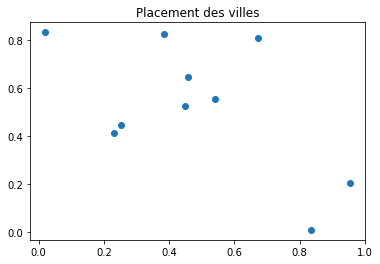

In [2]:
N=10

# Génération des points

M=np.random.uniform(0,1,(N,2))
plt.plot(M[:,0],M[:,1],'o')
plt.title('Placement des villes')
plt.show()


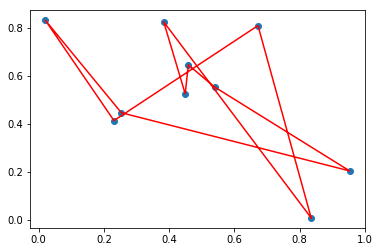

In [3]:
# Trajet initial

MM=np.zeros((N+1,2))
MM[0:N]=M
MM[N]=M[0]
plt.plot(M[:,0],M[:,1],'o')
plt.plot(MM[:,0],MM[:,1],'r-')
plt.show()

In [4]:
# Matrice des distances

def Mat_Dist(M):
    D=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            D[i,j]=np.linalg.norm(M[i]-M[j])
    return D

S=np.arange(N)
D=Mat_Dist(M)

2) Calcul de la longueur d'une tournée. On en profite pour définir la fonction qui tracera une tournée.

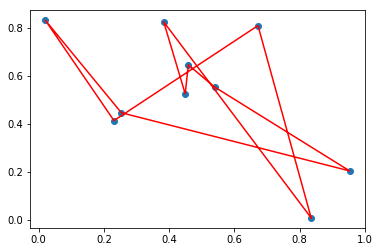

In [5]:
# Calcul de la longueur du trajet

def long(S,D):
    L=D[S[0],S[-1]]
    for i in range(N-1):
        L+=D[S[i],S[i+1]]
    return L

# Fonction qui prend un N-cycle et des points en entrée et dessine le parcours correspondant

def plot_traj(S,M):
    M=M[S]
    MM=np.zeros((N+1,2))
    MM[0:N]=M
    MM[N]=M[0]
    plt.plot(M[:,0],M[:,1],'o')
    plt.plot(MM[:,0],MM[:,1],'r-')
    #plt.show()
    
plot_traj(S,M)  

3) Cette notion de voisinage signifie que $\sigma\sim\sigma'$ si et seulement si il existe $i_0,i_1\in\{1,\dots,N\}$ distincts tels que :
$$ \forall i\neq i_0,i_1,\ \sigma(i)=\sigma'(i) $$
et
$$ \sigma'(i_0)=\sigma(i_1),\ \sigma'(i_1)=\sigma(i_0).$$

En d'autres termes, $\sigma$ et $\sigma'$ sont voisines s'il existe une transposition $\tau$ (une permutation de 2 éléments) telle que $\sigma'=\tau\circ\sigma$.

Exemple : pour $(1324)$, on obtient comme voisins : $(3124),(2314),(4321),(1234),(1423),(1342)$. Pour y voir plus clair, en écrivant toutes les permutations en partant de 1 et en éliminant les doublons : $(1243),(1423),(1432),
(1234),(1342)$.

Remarque : la méthode ci-dessus ne correspond pas exactement à la marche aléatoire symétrique sur les voisins, vu que deux transpositions différentes peuvent donner le même résultat. Mais ce n'est pas très grave d'un point de vue algorithmique.

4) La marche étant symétrique, chaque permutation a le même nombre de voisins. Notons $V_N$ ce nombre. La matrice de sélection $Q$ s'écrit ici :
$$ Q(\sigma,\sigma')=\begin{cases} 1/V_N & \text{ si }\sigma\sim\sigma'\\
0 & \text{ sinon}\end{cases}.$$

Cette matrice est bien symétrique. Pour voir qu'elle est irréductible, on utilise le théorème de structure du groupe symétrique : tout cycle $\sigma$ peut s'écrire comme produit de transpositions (des cycles avec 2 éléments). Comme la marche aléatoire consiste à appliqer des transpositions successives, on en déduit que l'on peut toujours passer d'une permutation à l'autre quitte à appliquer suffisemment de transpositions. 

5) On utilise ici la fontion sample de la librairie random.

In [6]:
def permute(S):
    T=np.copy(S)
    t=rdm.sample(range(N),2)
    T[t[0]]=S[t[1]]
    T[t[1]]=S[t[0]]
    return T

# Test
S=np.arange(N)
T=permute(S)
print(S)
print(T)

[0 1 2 3 4 5 6 7 8 9]
[9 1 2 3 4 5 6 7 8 0]


6) On commence par définir la fonction de rejet.

In [7]:
# Fonction de rejet

def delta(S0,S1,T):
    return (1/(1+np.exp(-(long(S0,D)-long(S1,D))/T)))

Remarque : j'ai utilisé la fonction $g$ introduite dans le TD4 à la place du $min$. Les deux fonctionnent dans cette situation (vous pouvez tester les deux et voir si l'un est plsu efficace que l'autre).

Choix du $h$ : le paramètre $h^*$ correspond à la hauteur du plus grand puits à franchir pour atteindre le min global. Pour en prendre une estimation large, on peut considérer $h=\sqrt2 N$, qui correspond à la longueur du chemin le plus long possible dans le carré $[0,1]^2$ ($N$ trajets entre deux coins opposés du carré, distants de $\sqrt2$).

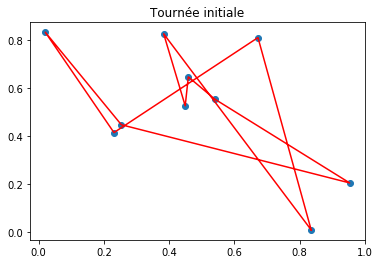

In [8]:
# recuit simulé

eps=0.07 # seuil de température minimale
n=2 
S0=np.arange(N) # permutation de départ
h=1
T=h/np.log(n) # température initiale
L=np.array([long(S0,D)]) # initialisation du tableau contenant les longueurs des trajectoires successives

plot_traj(S0,M) # représentation de la première trajectoire
plt.title("Tournée initiale")
plt.show()

while T>eps:
    S=permute(S0) # candidat obtenu avec Q
    u=np.random.uniform()
    if u<delta(S0,S,T): # rejet
        S0=S
    L=np.append(L,long(S0,D))
    n+=1
    T=h/np.log(n) # décroissance de la température

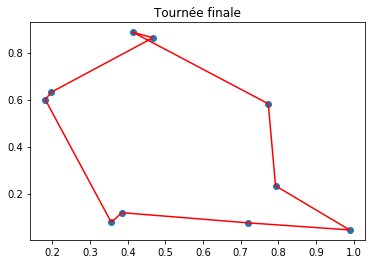

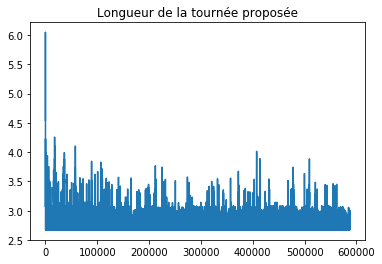

In [110]:
plot_traj(S0,M) # tracé de la tournée finale
plt.title('Tournée finale')
plt.show()

plt.plot(L) # tracé de la longueur de la tournée en fonction du temps
plt.title('Longueur de la tournée proposée')
plt.show()

Remarque 1 : on peut être amené à interrompre le recuit avant que la température soit passée en dessous du seuil prescrit (parce que la décroissance en $1/log(n)$ c'est vraiment trop long).

Remarque 2 : on pourra adapter l'échelle de représentation de la liste des longueurs, par exemple en utilisant un reprère semi-logarithmique.

# Pour aller plus loin

1) On peut modifier un peu l'algo ci-dessus pour traiter le problème du TD4 (avec le bras robotique). Le coeur du recuit simulé ne change pas, mais la fonction qui calcule les distances est différente.


2) On peut changer la méthode de génération des villes : au lieu de les prendre uniformément réparties, on peut considérer des variantes :
- générer les villes par clusters : construire deux (ou plus) groupes de villes indépendants qui peuvent, par exemple, correspondre à différents pays;
- considérer un modèle insulaire : une grande île centrale regrouppant beaucoup de villes à visiter et quelques villes isolées en périphérie.

On peut aussi changer le calcul de longueurs, par exemple en donnant plus de poids à certains parcours. Typiquement, les trajet est-ouest peuvent être plus coûteux que les trajets oues-est à cause de certains vents, ou intégrer des obstacles qui emêchent certains trajets (montagne, pays en guerre, etc.).

3) On peut aussi essayer d'implémenter un affichage dynamique dans la boucle while, pour afficher en direct la trajectoire proposée et voir son évolution au cours du temps.

4) À vous de faire jouer votre imagination !